<a href="https://colab.research.google.com/github/luisfelipebp/classification-adult-income/blob/main/classification_adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Projeto: Predição de Renda (Adult Dataset)

**Objetivo Principal:** Classificar indivíduos em duas categorias de renda:

- "> 50K" (renda anual maior que $50.000)

- "<= 50K" (renda anual menor ou igual a $50.000).

Variável Alvo: income, valores ">50K" e "<=50K".

Características Comuns:
- age: idade
- workclass: classe de trabalho (ex: Private, Self-emp-not-inc, Local-gov)
- fnlwgt: "final weight" - estimativa do número de pessoas que a entrada representa
- education: nível de educação (ex: Bachelors, HS-grad, Masters)
- education-num: representação numérica do nível de educação
- marital-status: estado civil (ex: Married-civ-spouse, Never-married)
- occupation: ocupação (ex: Tech-support, Craft-repair, Sales)
- relationship: relacionamento (ex: Husband, Not-in-family, Own-child)
- race: raça (ex: White, Black, Asian-Pac-Islander)
- sex: sexo (Female, Male)
- capital-gain: ganho de capital
- capital-loss: perda de capital
- hours-per-week: horas trabalhadas por semana
- native-country: país de origem

Dataset: [Adult](https://archive.ics.uci.edu/dataset/2/adult)

# Importando base de dados do UCI

In [67]:
! pip install ucimlrepo

In [68]:
import warnings
warnings.filterwarnings('ignore')
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

In [69]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [70]:
X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [71]:
y.head(2)

,income
0,<=50K
1,<=50K


In [72]:
df = pd.concat([X, y], axis=1)

In [73]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [74]:
df.isnull().sum().sort_values(ascending=False).head(5)

,0
occupation,966
workclass,963
native-country,274
age,0
fnlwgt,0


In [75]:
df.workclass.fillna(df.workclass.mode()[0], inplace=True)
df.occupation.fillna(df.occupation.mode()[0], inplace=True)

In [76]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum().sort_values(ascending=False).head(5)

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0


In [78]:
df['income'] =  df['income'].replace({'<=50K.': '<=50K','>50K.': '>50K'})

# Análise Gráfica

In [79]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


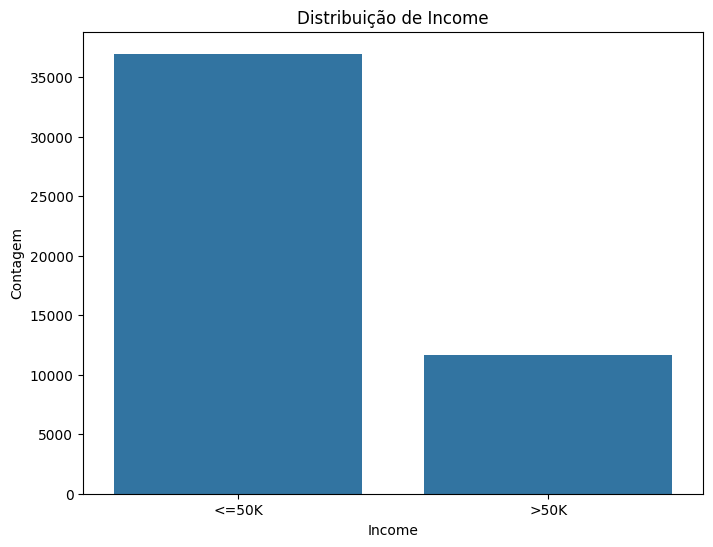

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income')
plt.title('Distribuição de Income')
plt.xlabel('Income')
plt.ylabel('Contagem')
plt.show()

# Pré Processamento dos dados



In [81]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [83]:
df.income.value_counts()

,count
income,
<=50K,36955
>50K,11613


In [84]:
df.income.replace({'<=50K': 0,'>50K': 1}, inplace=True)

In [85]:
colunas_categoricas = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [86]:
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), colunas_categoricas)
    ],
    remainder='passthrough'
)

In [87]:
array_transformer = col_transformer.fit_transform(df)

In [88]:
df2 = pd.DataFrame(array_transformer, columns=col_transformer.get_feature_names_out())

In [89]:
df2.head()

,cat__workclass_?,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,cat__workclass_Private,cat__workclass_Self-emp-inc,cat__workclass_Self-emp-not-inc,cat__workclass_State-gov,cat__workclass_Without-pay,cat__education_10th,...,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia,remainder__age,remainder__fnlwgt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,50.0,83311.0,13.0,0.0,0.0,13.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0,0.0


In [90]:
(df2.dtypes != 'float64').sum()

0

In [91]:
previsores = df2.iloc[:, 0:108].values

In [92]:
previsores

array([[   0.,    0.,    0., ..., 2174.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   13.],
       [   0.,    0.,    0., ...,    0.,    0.,   40.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,   50.],
       [   0.,    0.,    0., ..., 5455.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   60.]])

In [93]:
alvo = df2.iloc[:, 108].values

In [94]:
alvo

array([0., 0., 0., ..., 0., 0., 1.])

# METÓDOS

In [95]:
def model_train(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_predict = model.predict(x_test)
    y_predict_train = model.predict(x_train)

    print(f'Acurácia Teste = {accuracy_score(y_test,y_predict)}')
    print(f'Acurácia Treino = {accuracy_score(y_train,y_predict_train)} \n')
    print(f'Classificação = \n {classification_report(y_test,y_predict)}')

    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)

    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["<=50k", ">50k"], yticklabels=["<=50k", ">50k"])

    plt.xlabel('Previsto')
    plt.ylabel('Atual')
    plt.title('Matriz de confusão')
    plt.show()

    print(f'\nMatriz de confusão \n {confusion_matrix(y_test,y_predict)}\n')

In [96]:
def model_train_scaler(model, x_train, x_test, y_train, y_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model.fit(x_train_scaled, y_train)

    y_predict = model.predict(x_test_scaled)
    y_predict_train = model.predict(x_train_scaled)

    print(f'Acurácia Teste = {accuracy_score(y_test, y_predict)}')
    print(f'Acurácia Treino = {accuracy_score(y_train, y_predict_train)} \n')
    print(f'Classificação = \n {classification_report(y_test, y_predict)}')

    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)

    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["<=50k", ">50k"], yticklabels=["<=50k", ">50k"])

    plt.xlabel('Previsto')
    plt.ylabel('Atual')
    plt.title('Matriz de confusão')
    plt.show()

    print(f'\nMatriz de confusão \n {confusion_matrix(y_test, y_predict)}\n')


# BASE TREINO E TESTE

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 7)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

Acurácia Teste = 0.7899251938782513
Acurácia Treino = 0.8291319822337265 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.87     11005
         1.0       0.65      0.31      0.42      3566

    accuracy                           0.79     14571
   macro avg       0.73      0.63      0.65     14571
weighted avg       0.77      0.79      0.76     14571



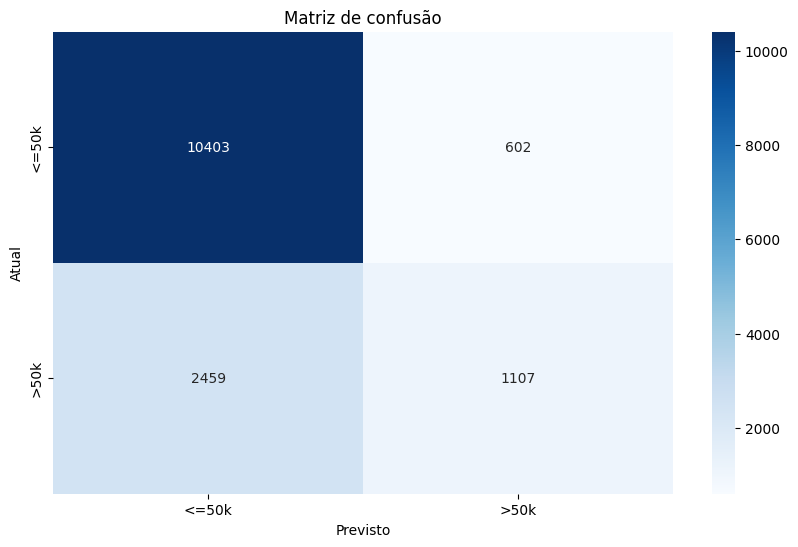


Matriz de confusão 
 [[10403   602]
 [ 2459  1107]]



In [101]:
model_train(KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.8278086610390502
Acurácia Treino = 0.8658411036267906 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     11005
         1.0       0.68      0.56      0.61      3566

    accuracy                           0.83     14571
   macro avg       0.77      0.74      0.75     14571
weighted avg       0.82      0.83      0.82     14571



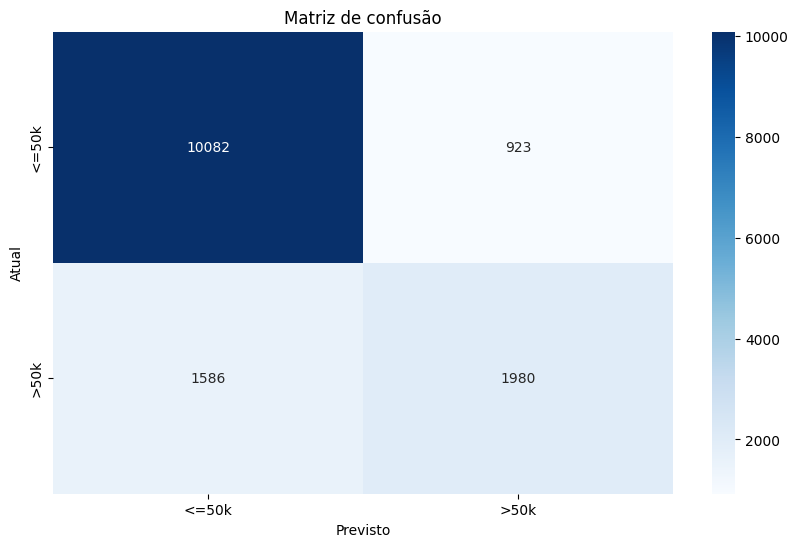


Matriz de confusão 
 [[10082   923]
 [ 1586  1980]]



In [102]:
model_train_scaler(KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [103]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [104]:
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 79.21%


# SVC

In [105]:
from sklearn.svm import SVC

Acurácia Teste = 0.7952096630293047
Acurácia Treino = 0.8026884725122805 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     11005
         1.0       0.93      0.18      0.30      3566

    accuracy                           0.80     14571
   macro avg       0.86      0.59      0.59     14571
weighted avg       0.82      0.80      0.74     14571



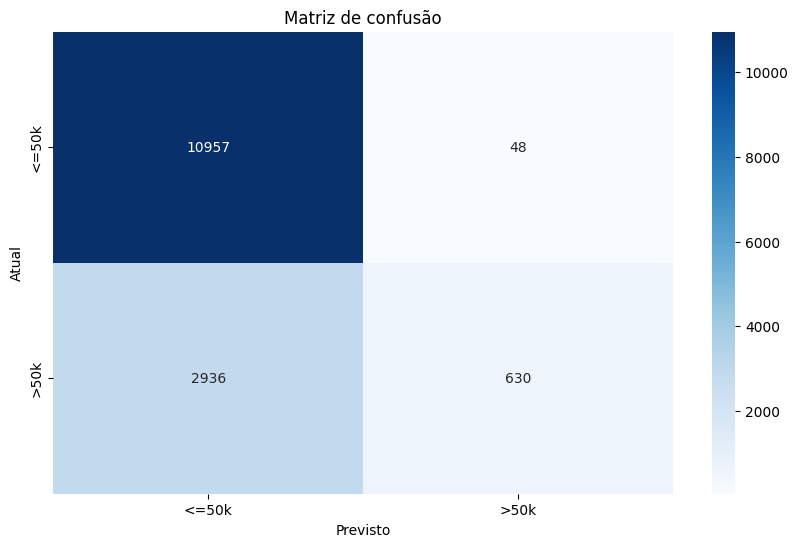


Matriz de confusão 
 [[10957    48]
 [ 2936   630]]



In [106]:
model_train(SVC(kernel='rbf', random_state=7, C = 2),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.8505936449111249
Acurácia Treino = 0.8685472247551255 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     11005
         1.0       0.76      0.58      0.65      3566

    accuracy                           0.85     14571
   macro avg       0.81      0.76      0.78     14571
weighted avg       0.84      0.85      0.84     14571



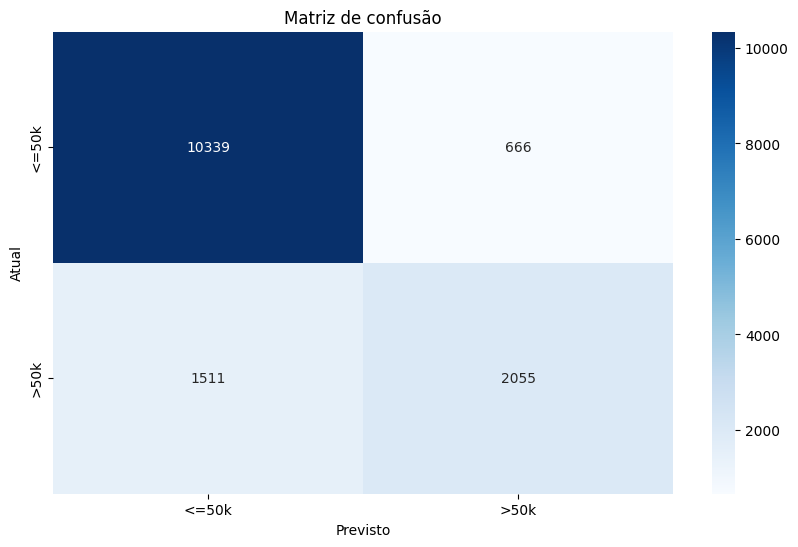


Matriz de confusão 
 [[10339   666]
 [ 1511  2055]]



In [107]:
model_train_scaler(SVC(kernel='rbf', random_state=7, C = 2),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [108]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [109]:
modelo = SVC(kernel='rbf', random_state=7, C = 2)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 80.03%


# RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier

Acurácia Teste = 0.8571134445130739
Acurácia Treino = 0.8669000205900521 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     11005
         1.0       0.81      0.55      0.65      3566

    accuracy                           0.86     14571
   macro avg       0.84      0.75      0.78     14571
weighted avg       0.85      0.86      0.85     14571



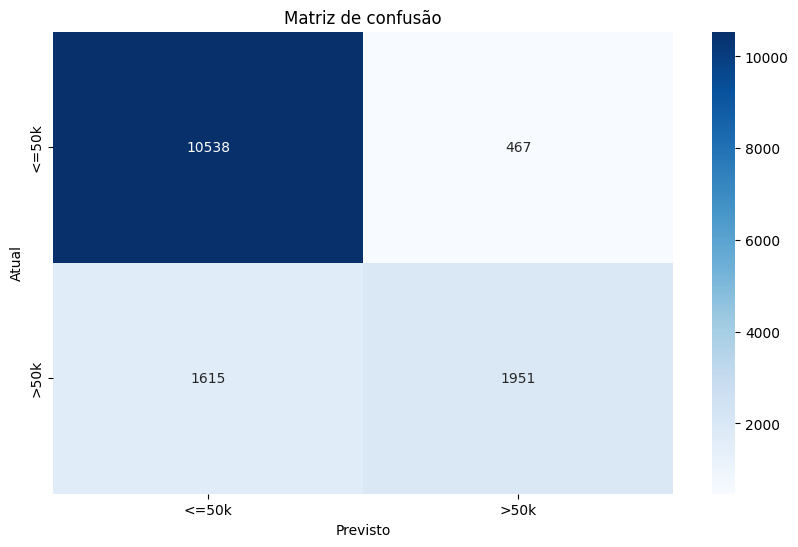


Matriz de confusão 
 [[10538   467]
 [ 1615  1951]]



In [111]:
model_train(RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 7, max_depth=11),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.8571134445130739
Acurácia Treino = 0.8669000205900521 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     11005
         1.0       0.81      0.55      0.65      3566

    accuracy                           0.86     14571
   macro avg       0.84      0.75      0.78     14571
weighted avg       0.85      0.86      0.85     14571



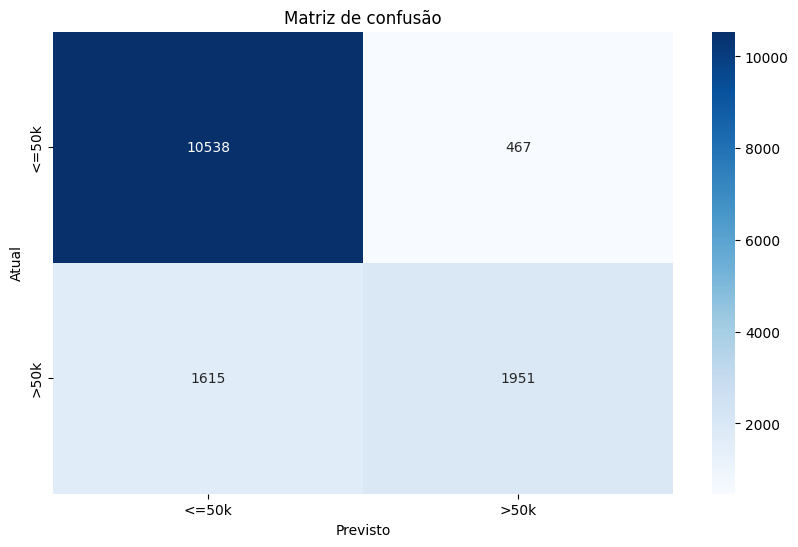


Matriz de confusão 
 [[10538   467]
 [ 1615  1951]]



In [112]:
model_train_scaler(RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 7, max_depth=11),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [113]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [114]:
modelo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 7, max_depth=11)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.82%


# ÁRVORE DE DECISÃO

In [115]:
from sklearn.tree import DecisionTreeClassifier

Acurácia Teste = 0.8560153730011667
Acurácia Treino = 0.8633997117392711 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     11005
         1.0       0.77      0.58      0.66      3566

    accuracy                           0.86     14571
   macro avg       0.82      0.76      0.79     14571
weighted avg       0.85      0.86      0.85     14571



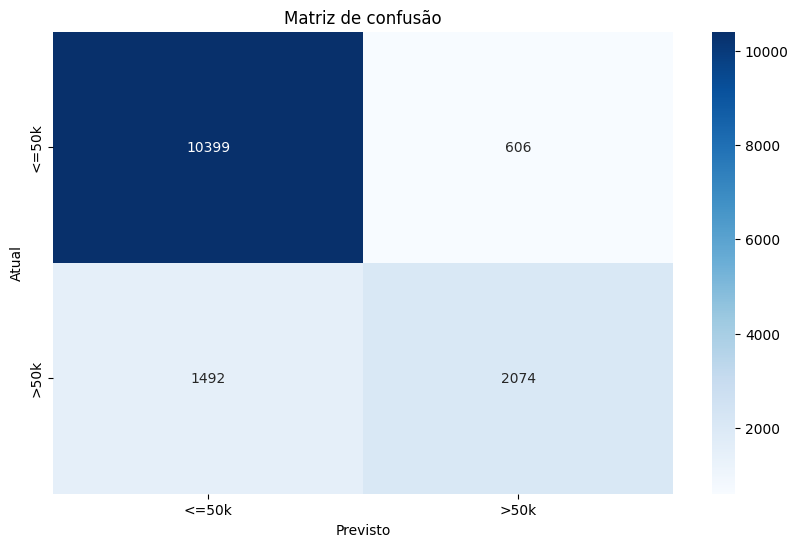


Matriz de confusão 
 [[10399   606]
 [ 1492  2074]]



In [116]:
model_train(DecisionTreeClassifier(criterion='entropy', random_state = 7, max_depth=8),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.8560153730011667
Acurácia Treino = 0.8633997117392711 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     11005
         1.0       0.77      0.58      0.66      3566

    accuracy                           0.86     14571
   macro avg       0.82      0.76      0.79     14571
weighted avg       0.85      0.86      0.85     14571



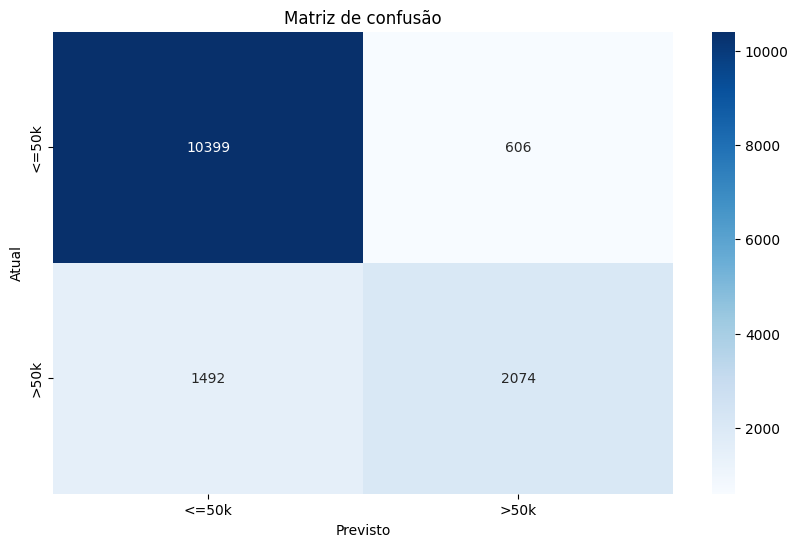


Matriz de confusão 
 [[10399   606]
 [ 1492  2074]]



In [117]:
model_train_scaler(DecisionTreeClassifier(criterion='entropy', random_state = 7, max_depth=8),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [118]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [119]:
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 7, max_depth=8)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.82%


# XGBOOST

In [120]:
from xgboost import XGBClassifier

Acurácia Teste = 0.8711138562898909
Acurácia Treino = 0.9108450745654029 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     11005
         1.0       0.79      0.64      0.71      3566

    accuracy                           0.87     14571
   macro avg       0.84      0.79      0.81     14571
weighted avg       0.87      0.87      0.87     14571



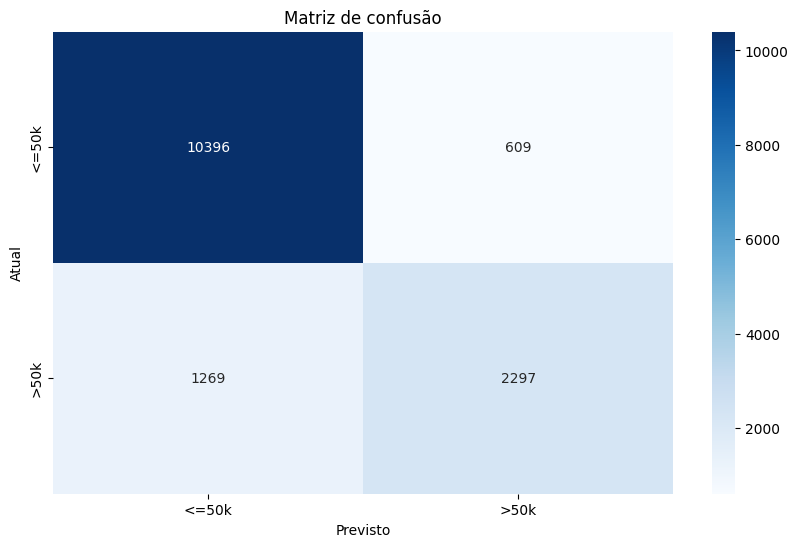


Matriz de confusão 
 [[10396   609]
 [ 1269  2297]]



In [121]:
model_train(XGBClassifier(max_depth=11, learning_rate=0.05, n_estimators=220, objective='binary:logistic', random_state=7),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.8711138562898909
Acurácia Treino = 0.9108450745654029 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     11005
         1.0       0.79      0.64      0.71      3566

    accuracy                           0.87     14571
   macro avg       0.84      0.79      0.81     14571
weighted avg       0.87      0.87      0.87     14571



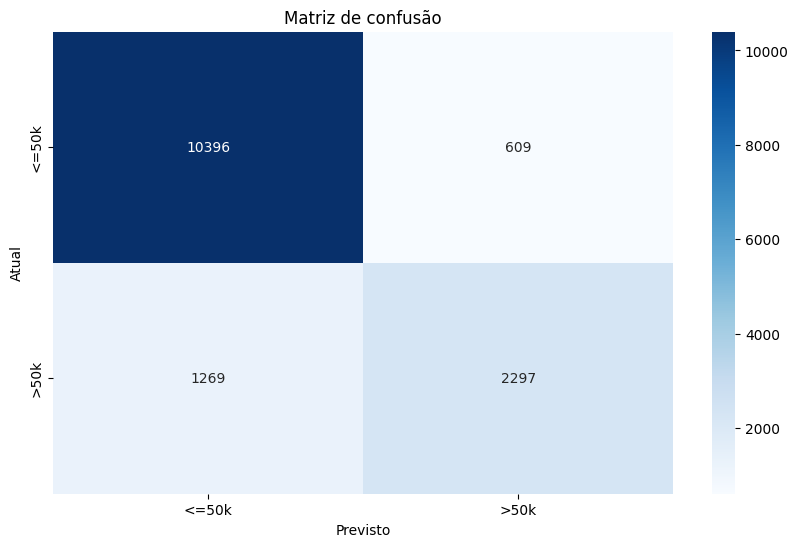


Matriz de confusão 
 [[10396   609]
 [ 1269  2297]]



In [122]:
model_train_scaler(XGBClassifier(max_depth=11, learning_rate=0.05, n_estimators=220, objective='binary:logistic', random_state=7),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [123]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [124]:
modelo =XGBClassifier(max_depth=11, learning_rate=0.05, n_estimators=220, objective='binary:logistic', random_state=7)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 87.39%


# REGRESSÂO LOGÍSTICA

In [125]:
from sklearn.linear_model import LogisticRegression

Acurácia Teste = 0.8353579026834123
Acurácia Treino = 0.8351325116922081 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11005
         1.0       0.73      0.53      0.61      3566

    accuracy                           0.84     14571
   macro avg       0.79      0.73      0.75     14571
weighted avg       0.83      0.84      0.83     14571



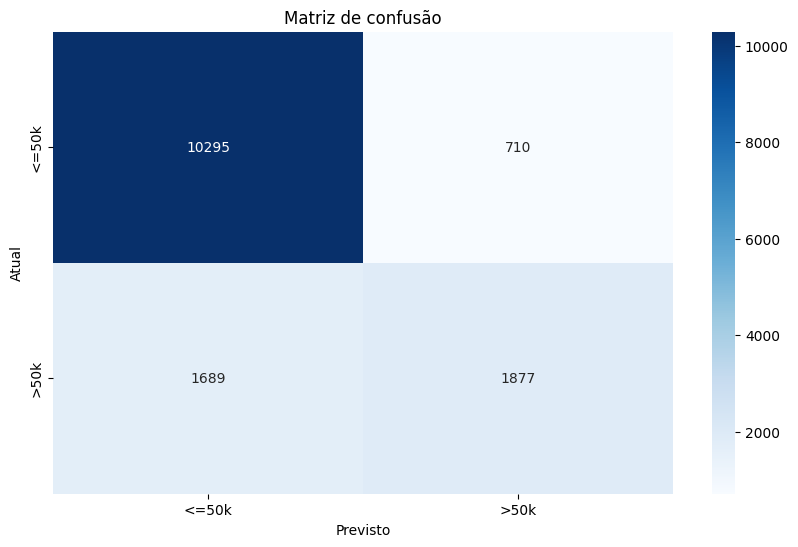


Matriz de confusão 
 [[10295   710]
 [ 1689  1877]]



In [126]:
model_train(LogisticRegression(random_state=7, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs"),x_treino,x_teste,y_treino,y_teste)

Acurácia Teste = 0.850319127033148
Acurácia Treino = 0.853575315469012 

Classificação = 
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     11005
         1.0       0.74      0.60      0.66      3566

    accuracy                           0.85     14571
   macro avg       0.81      0.77      0.78     14571
weighted avg       0.84      0.85      0.84     14571



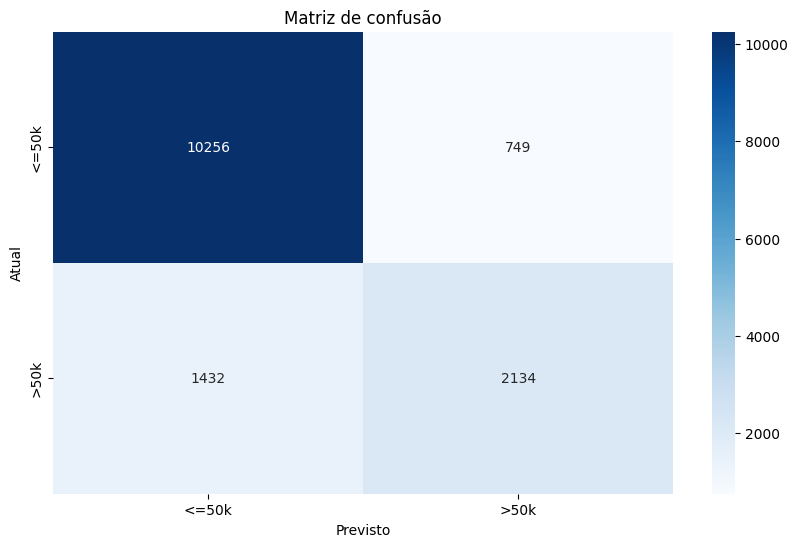


Matriz de confusão 
 [[10256   749]
 [ 1432  2134]]



In [127]:
model_train_scaler(LogisticRegression(random_state=7, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs"),x_treino,x_teste,y_treino,y_teste)

**Validação Cruzada**

In [128]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 7)

In [129]:
modelo = LogisticRegression(random_state=1, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 83.44%


# REDES NEURAIS

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [131]:
rede_neural = Sequential([
    tf.keras.layers.InputLayer(shape = (108,)),
    tf.keras.layers.Dense(units = 55, activation = 'relu', kernel_initializer = 'random_uniform'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [132]:
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [133]:
rede_neural.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [134]:
rede_neural.fit(x_treino, y_treino, batch_size = 256, epochs = 100)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.6561 - loss: 600.5928
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7423 - loss: 0.8817
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7711 - loss: 0.7367
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7690 - loss: 0.5804
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7663 - loss: 0.5955
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7733 - loss: 0.5563
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7721 - loss: 0.5570
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7682 - loss: 0.5542
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7720 - loss: 0.5729
Epoch 10/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7714 - loss: 0.5440
Epoch 11/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - b

In [135]:
previsao = rede_neural.predict(x_teste)
previsao = previsao > 0.5

456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [136]:
accuracy_score(y_teste, previsao)

0.7987097659735091

In [137]:
confusion_matrix(y_teste, previsao)

array([[10912,    93],
       [ 2840,   726]])

In [138]:
rede_neural.evaluate(x_teste, y_teste)

456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.7989 - loss: 0.4925


[0.49177899956703186, 0.7987097501754761]